In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#D atavisualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.offline import iplot, init_notebook_mode


# Machine Learning




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# GOAL OF THE NOTEBOOK
Predict sales prices and practice feature engineering, RFs, and gradient boosting

### File descriptions
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
**MSSubClass**: The building class
**MSZoning**: The general zoning classification
**LotFrontage**: Linear feet of street connected to property
**LotArea**: Lot size in square feet
**Street**: Type of road access
**Alley**: Type of alley access
**LotShape**: General shape of property
**LandContour**: Flatness of the property
**Utilities**: Type of utilities available
**LotConfig**: Lot configuration
**LandSlope**: Slope of property
**Neighborhood**: Physical locations within Ames city limits
**Condition1**: Proximity to main road or railroad
**Condition2**: Proximity to main road or railroad (if a second is present)
**BldgType**: Type of dwelling
**HouseStyle**: Style of dwelling
**OverallQual**: Overall material and finish quality
**OverallCond**: Overall condition rating
**YearBuilt**: Original construction date
**YearRemodAdd**: Remodel date
**RoofStyle**: Type of roof
**RoofMatl**: Roof material
**Exterior1st**: Exterior covering on house
**Exterior2nd**: Exterior covering on house (if more than one material)
**MasVnrType**: Masonry veneer type
**MasVnrArea**: Masonry veneer area in square feet
**ExterQual**: Exterior material quality
**ExterCond**: Present condition of the material on the exterior
**Foundation**: Type of foundation
**BsmtQual**: Height of the basement
**BsmtCond**: General condition of the basement
**BsmtExposure**: Walkout or garden level basement walls
**BsmtFinType1**: Quality of basement finished area
**BsmtFinSF1**: Type 1 finished square feet
**BsmtFinType2**: Quality of second finished area (if present)
**BsmtFinSF2**: Type 2 finished square feet
**BsmtUnfSF**: Unfinished square feet of basement area
**TotalBsmtSF**: Total square feet of basement area
**Heating**: Type of heating
**HeatingQC**: Heating quality and condition
**CentralAir**: Central air conditioning
**Electrical**: Electrical system
**1stFlrSF**: First Floor square feet
**2ndFlrSF**: Second floor square feet
**LowQualFinSF**: Low quality finished square feet (all floors)
**GrLivArea**: Above grade (ground) living area square feet
**BsmtFullBath**: Basement full bathrooms
**BsmtHalfBath**: Basement half bathrooms
**FullBath**: Full bathrooms above grade
**HalfBath**: Half baths above grade
**Bedroom**: Number of bedrooms above basement level
**Kitchen**: Number of kitchens
**KitchenQual**: Kitchen quality
**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
**Functional**: Home functionality rating
**Fireplaces**: Number of fireplaces
**FireplaceQu**: Fireplace quality
**GarageType**: Garage location
**GarageYrBlt**: Year garage was built
**GarageFinish**: Interior finish of the garage
**GarageCars**: Size of garage in car capacity
**GarageArea**: Size of garage in square feet
**GarageQual**: Garage quality
**GarageCond**: Garage condition
**PavedDrive**: Paved driveway
**WoodDeckSF**: Wood deck area in square feet
**OpenPorchSF**: Open porch area in square feet
**EnclosedPorch**: Enclosed porch area in square feet
**3SsnPorch**: Three season porch area in square feet
**ScreenPorch**: Screen porch area in square feet
**PoolArea**: Pool area in square feet
**PoolQC**: Pool quality
**Fence**: Fence quality
**MiscFeature**: Miscellaneous feature not covered in other categories
**MiscVal**: Value of miscellaneous feature
**MoSold**: Month Sold
**YrSold**: Year Sold
**SaleType**: Type of sale
**SaleCondition**: Condition of sale



# I - BASIC EDA

In [2]:
# Load all the data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
# Take a look of the shape
print(f'Train shape : {df_train.shape}')
print(f'Test shape : {df_test.shape}')
print(f'Submission shape : {df_submission.shape}')

Train shape : (1460, 81)
Test shape : (1459, 80)
Submission shape : (1459, 2)


In [4]:
# Configuration to see all features
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [7]:
df_submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

### First Step : We will concat the Train and Test set
    - 1 : combine df_test + df_submissions
    - 2 : Merge df_train + df _test

In [8]:
# Combine df_test + df_submisision
df_test_full = pd.merge(df_test,df_submission, how = 'inner')
df_test_full.shape

(1459, 81)

In [9]:
# Concat df_train + df_test_full
data = pd.concat([df_train,df_test_full], axis=0)
data.shape

(2919, 81)

In [10]:
#Copy the dataset for secure
df = data.copy()

### First Look on your Data

#### CHECKLIST :

##### Shape Analysis :
- target variable : **'SalePrice'**
- shape of your dataset : **row : 2919, columns : 81**
- Features types : **float64(12), int64(26), object(43)**
- Missing Values analysis : We have a lot of variables with NaN 
    - 1 **group : > 80% NaN**
            - PoolQC	99.657417
            - MiscFeature	96.402878
            - Alley	93.216855
            - Fence	80.438506
     - **2 group : >15 % <50%**
            - FireplaceQu	48.646797
            - LotFrontage	16.649538
     - **3 group : Garage Option**
            - GarageFinish	5.447071
            - GarageQual	5.447071
            - GarageCond	5.447071
            - GarageYrBlt	5.447071
            - GarageType	5.378554
     - **4 group : < 3%**
            - BsmtExposure	2.809181
            - BsmtCond	2.809181
            - BsmtQual	2.774923
            - BsmtFinType2	2.740665
            - BsmtFinType1	2.706406
     - **5 group :**
            - MasVnrType	0.822199
            - MasVnrArea	0.787941
            - MSZoning	0.137033
      - **6 group : Condtion Optional**
            - Functional	0.068517
            - Utilities	0.068517
            - BsmtHalfBath	0.068517
            - BsmtFullBath	0.068517
      - **7 group : Condition Optimal**
            - GarageArea	0.034258
            - BsmtFinSF1	0.034258
            - SaleType	0.034258
            - GarageCars	0.034258
            - BsmtUnfSF	0.034258
            - Electrical	0.034258
            - Exterior2nd	0.034258
            - Exterior1st	0.034258
            - KitchenQual	0.034258
            - TotalBsmtSF	0.034258
            - BsmtFinSF2	0.034258



In [11]:
# Take a look on the differents variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:ylabel='None'>

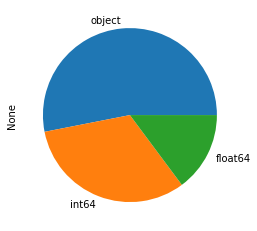

In [12]:
# Type representation
df.dtypes.value_counts().plot.pie()

In [13]:
#finding the unique values in each column
for col in df.columns:
    print('We have {} unique values in {} column'.format(len(df[col].unique()),col))
    print('__'*30)

We have 2919 unique values in Id column
____________________________________________________________
We have 16 unique values in MSSubClass column
____________________________________________________________
We have 6 unique values in MSZoning column
____________________________________________________________
We have 129 unique values in LotFrontage column
____________________________________________________________
We have 1951 unique values in LotArea column
____________________________________________________________
We have 2 unique values in Street column
____________________________________________________________
We have 3 unique values in Alley column
____________________________________________________________
We have 4 unique values in LotShape column
____________________________________________________________
We have 4 unique values in LandContour column
____________________________________________________________
We have 3 unique values in Utilities column
_______________

In [14]:
#describe our data
df[df.select_dtypes(exclude='object').columns].drop('Id',axis=1).describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

In [15]:
#find the null values in each column
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null values'})

Null values
PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797
LotFrontage      16.649538
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
Utilities         0.068517
BsmtHalfBath      0.068517
BsmtFullBath      0.068517
GarageArea        0.034258
BsmtFinSF1        0.034258
SaleType          0.034258
GarageCars        0.034258
BsmtUnfSF         0.034258
Electrical        0.034258
Exterior2nd       0.034258
Exterior1st       0.034258
KitchenQual       0.034258
TotalBsmtSF       0.034258
BsmtFinSF2        0.034258
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
Id                0.000000
BedroomAbvGr      0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleCondition     0.000000
KitchenAbvGr      0.000000
HeatingQC         0.000000
HalfBath          0.000000
FullBath          0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
Heating           0.000000
MSSubClass        0.000000
CentralAir        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
SalePrice         0.000000

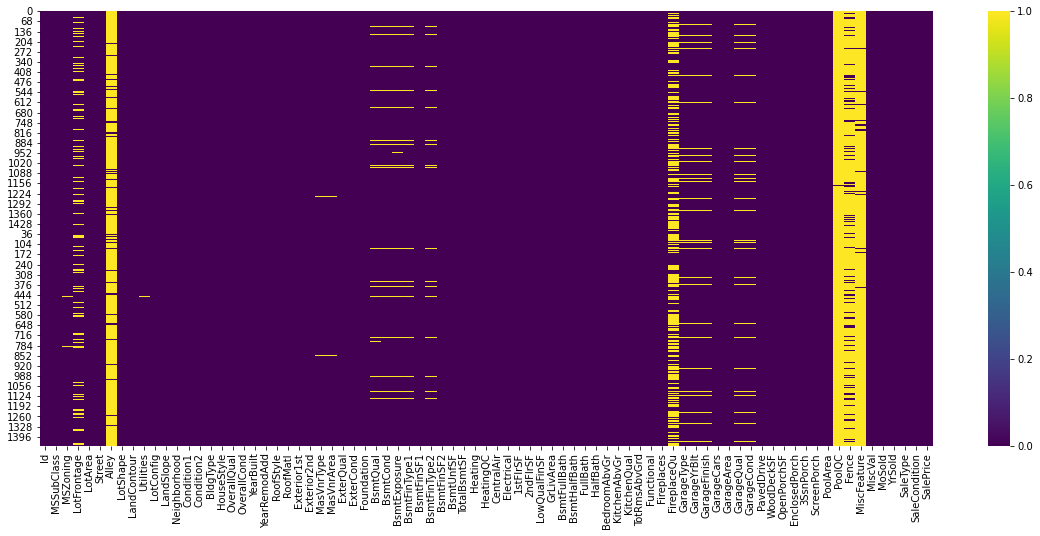

In [16]:
#visuaize the null values in each column
plt.figure(figsize=(20,8));
sns.heatmap(df.isnull(), cmap='viridis');

In [17]:
#lets see the correlation between columns and target column
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)[1:].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

In [18]:
#lets take a look to the shape of columns
df.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

Skewness
YearBuilt      -0.600114
YearRemodAdd   -0.451252
GarageYrBlt    -0.382150
GarageCars     -0.218373
Id              0.000000
YrSold          0.132467
FullBath        0.167692
MoSold          0.195985
OverallQual     0.197212
GarageArea      0.241301
BedroomAbvGr    0.326492
OverallCond     0.570605
BsmtFullBath    0.624062
HalfBath        0.694924
Fireplaces      0.733872
TotRmsAbvGrd    0.758757
2ndFlrSF        0.862118
BsmtUnfSF       0.919824
TotalBsmtSF     1.162882
GrLivArea       1.270010
MSSubClass      1.376165
BsmtFinSF1      1.425722
1stFlrSF        1.470360
LotFrontage     1.503278
WoodDeckSF      1.843380
OpenPorchSF     2.536417
SalePrice       2.549248
MasVnrArea      2.602589
BsmtHalfBath    3.932018
ScreenPorch     3.948723
EnclosedPorch   4.005950
BsmtFinSF2      4.147456
KitchenAbvGr    4.304467
3SsnPorch      11.381914
LowQualFinSF   12.094977
LotArea        12.829025
PoolArea       16.907017
MiscVal        21.958480

In [19]:
liste_skewness = ['MasVnrArea','BsmtHalfBath','ScreenPorch',
                  'EnclosedPorch','BsmtFinSF2','KitchenAbvGr','3SsnPorch','LowQualFinSF',
                  'LotArea','PoolArea','MiscVal']

### First Conclusion :

- A lot of NaN Values mostly on : 

      - PoolQC    99.657417
      - MiscFeature    96.402878
      - Alley    93.216855
      - Fence    80.438506
      
- SalePrice get a high correlation mostly with :  

    - GrLivArea	0.588010
    - OverallQual	0.550911
    - TotRmsAbvGrd	0.469800
    - GarageCars	0.469249
    - GarageArea	0.464809
    - 1stFlrSF	0.462865
    - TotalBsmtSF	0.453224
    - FullBath	0.433710
    - YearBuilt	0.362066
    - MasVnrArea	0.355608
    - Fireplaces	0.353567
    - YearRemodAdd	0.350032
    - GarageYrBlt	0.325297
    - LotFrontage	0.318084
    - LotArea	0.296497
    
- We got a high skewness with :  

    - 3SsnPorch	11.381914
    - LowQualFinSF	12.094977
    - LotArea	12.829025
    - PoolArea	16.907017
    - MiscVal	21.958480


### Take a look on your target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

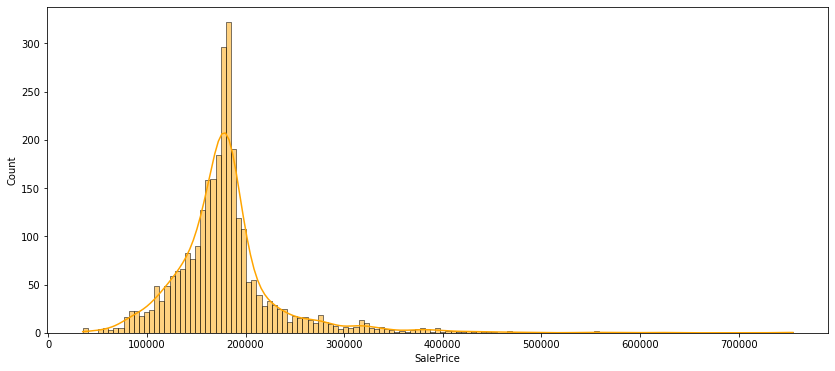

In [20]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x="SalePrice", kde=True, color='orange')

### Background ANALYSIS 

 ##### 1 - TARGET / TARGET : Numerical Variables

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

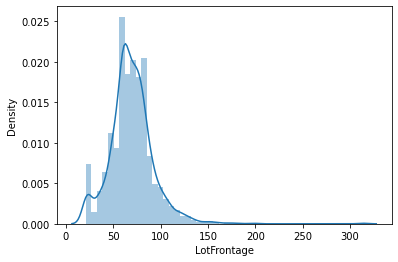

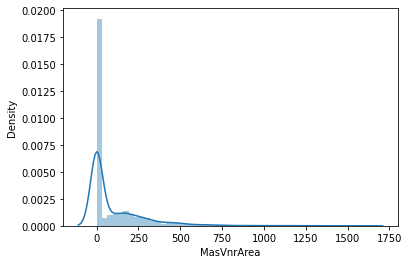

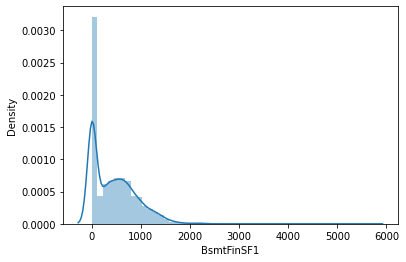

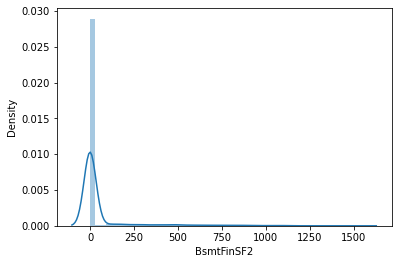

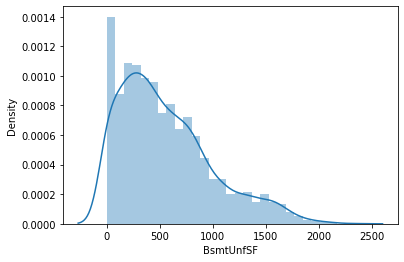

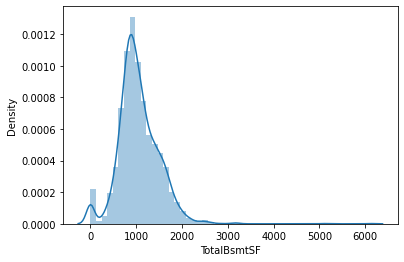

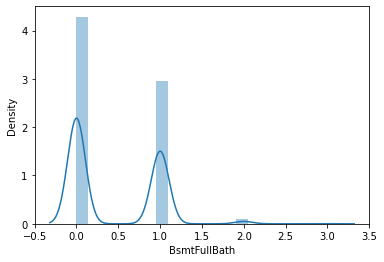

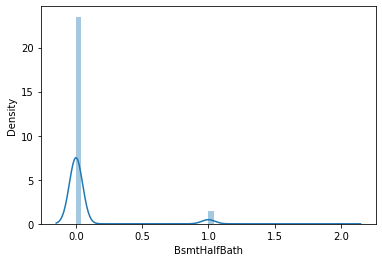

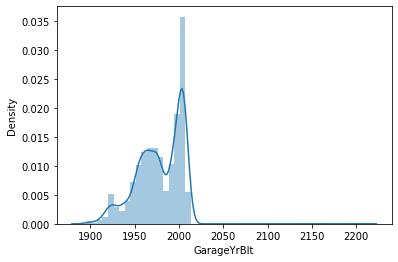

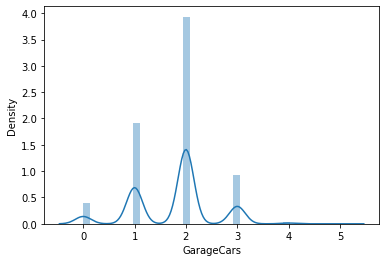

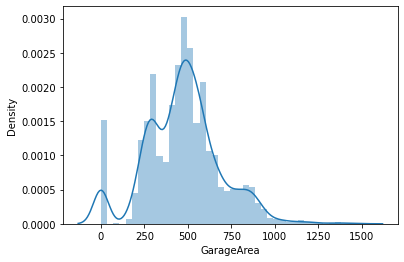

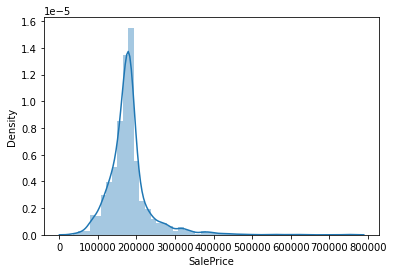

In [21]:
# Take a look on the numerical distributions
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/di

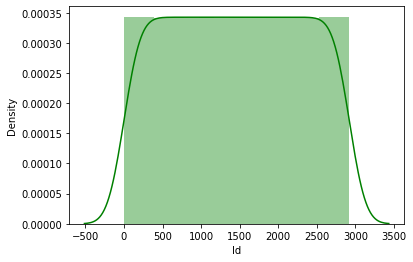

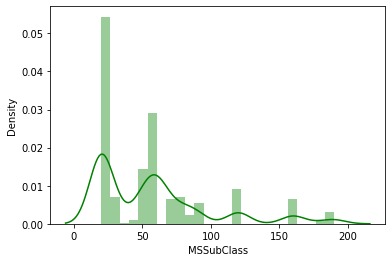

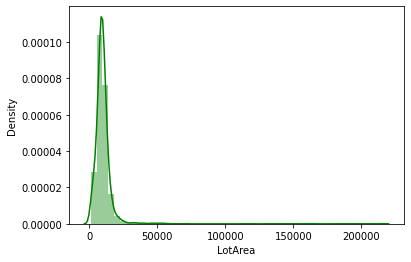

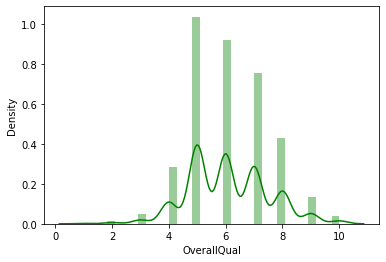

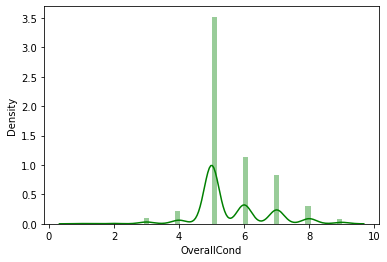

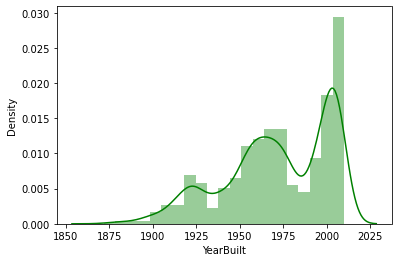

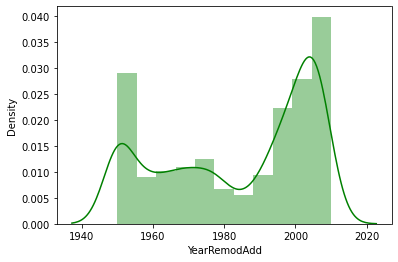

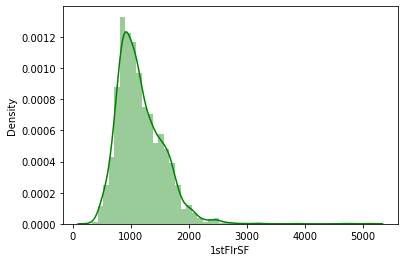

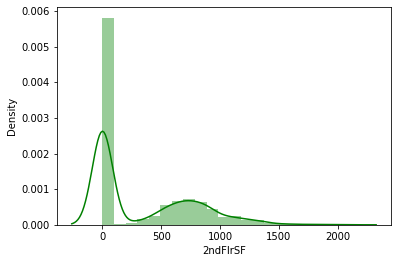

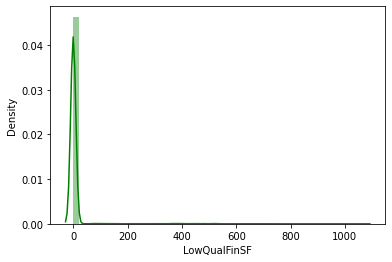

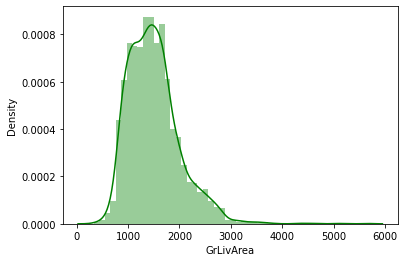

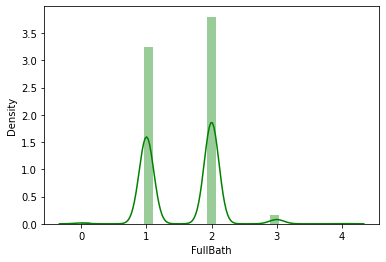

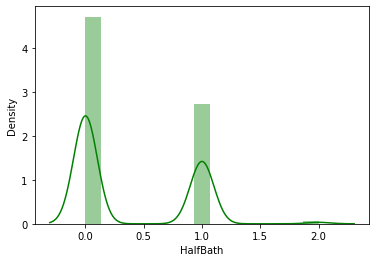

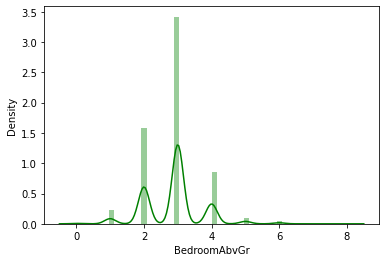

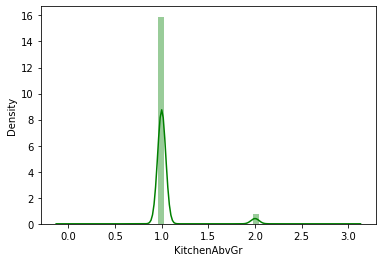

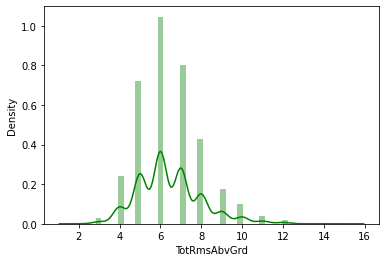

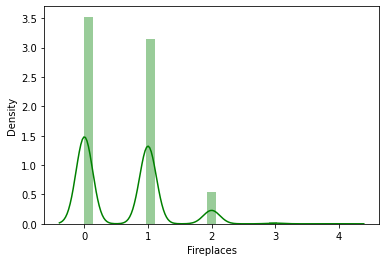

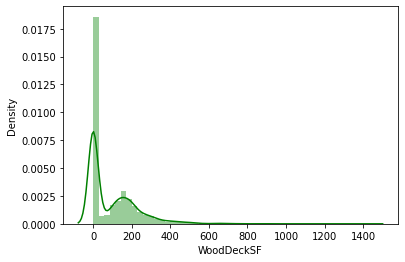

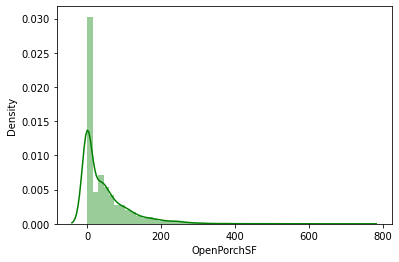

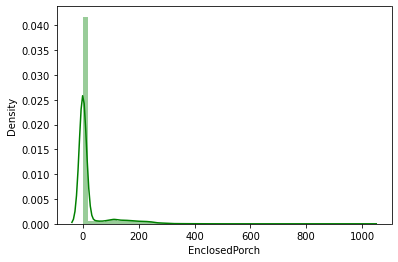

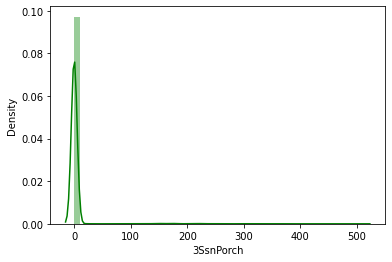

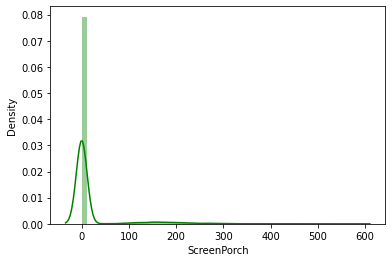

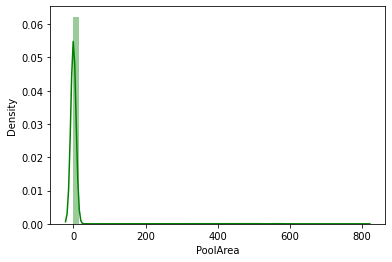

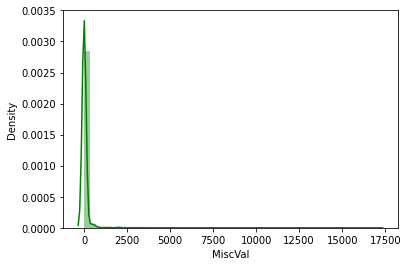

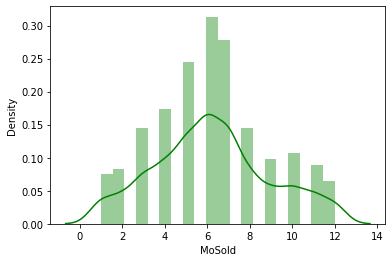

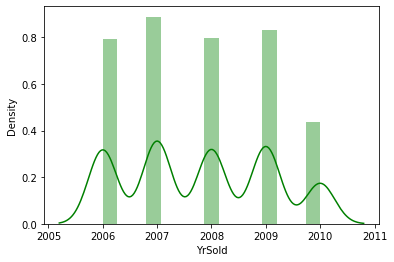

In [22]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col], color='g')

 ##### 2 - TARGET / TARGET : Categorical Variables

In [23]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street-------------------------------------------- ['Pave' 'Grvl']
Alley--------------------------------------------- [nan 'Grvl' 'Pave']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa' nan]
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'R

In [24]:
#for col in df.select_dtypes('object'):
#    plt.figure()
#    df[col].value_counts().plot.pie()

### Relationship Target/Features :

     1 - Numericals Features (float/int)

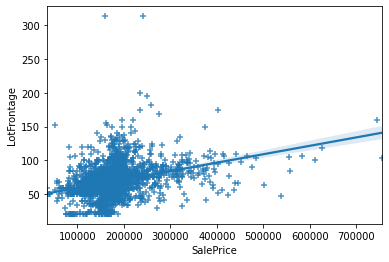

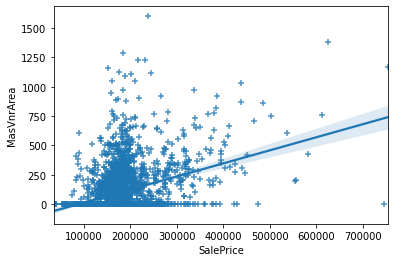

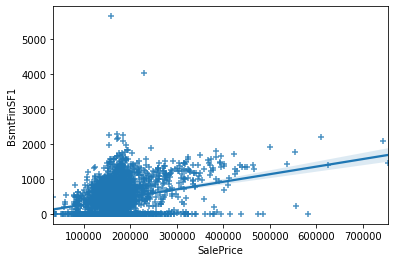

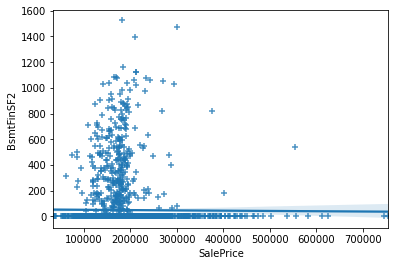

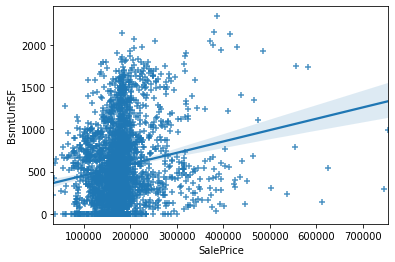

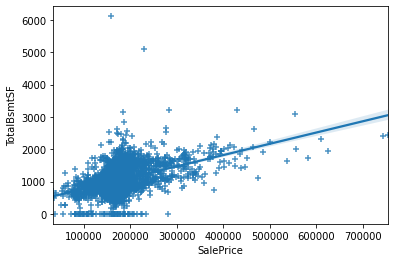

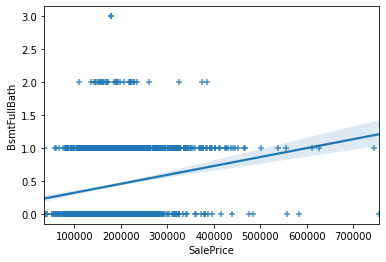

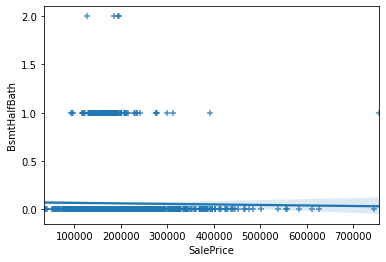

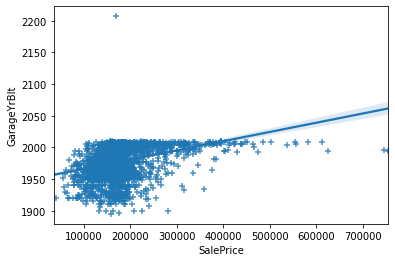

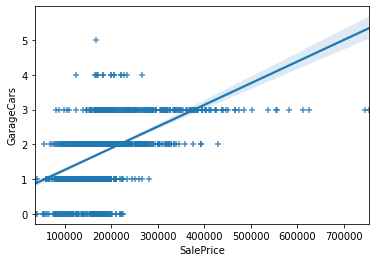

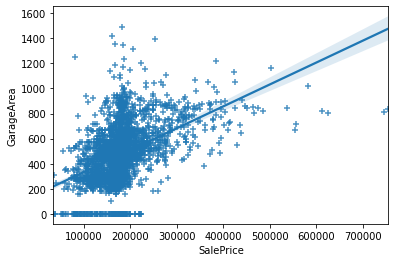

In [25]:
# Take a look on the numerical distributions : float type
for col in df.drop('SalePrice',axis=1).select_dtypes('float'):
    plt.figure()
    ax = sns.regplot(x=df['SalePrice'], y=df[col], marker="+")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



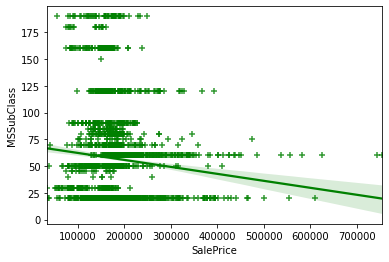

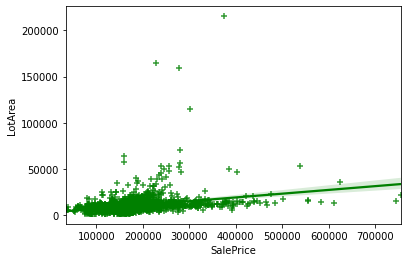

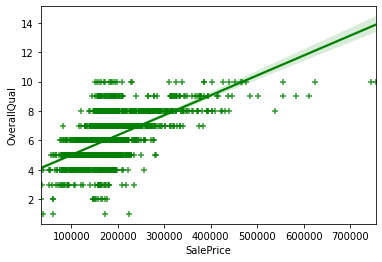

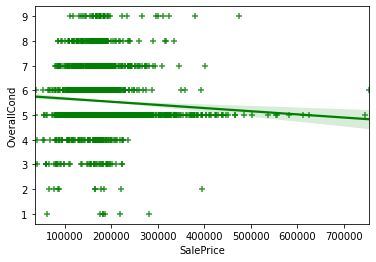

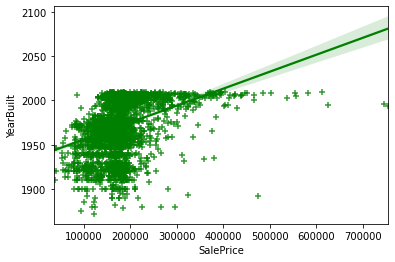

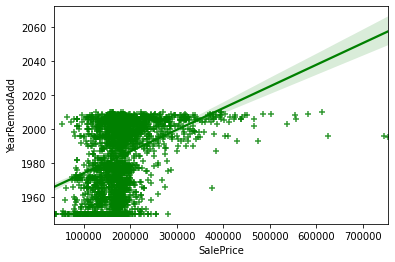

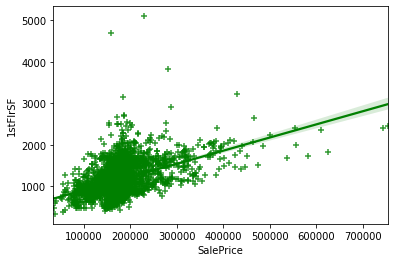

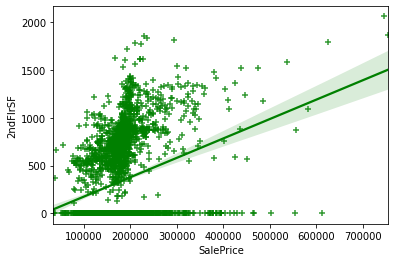

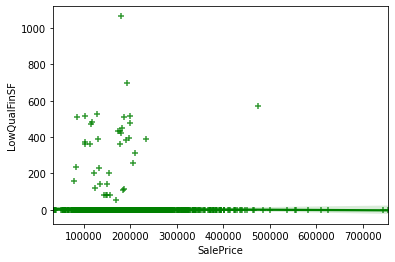

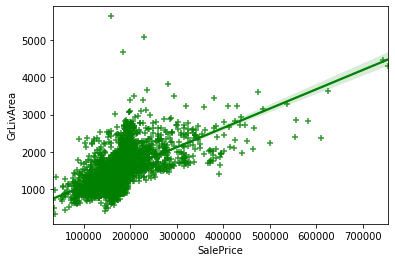

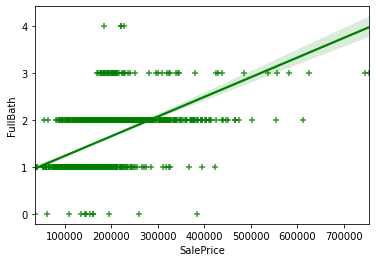

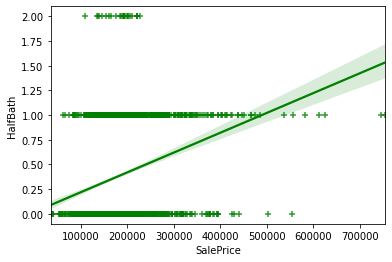

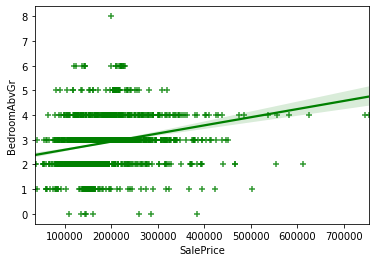

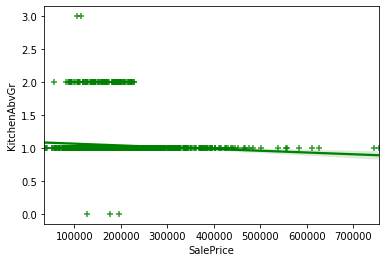

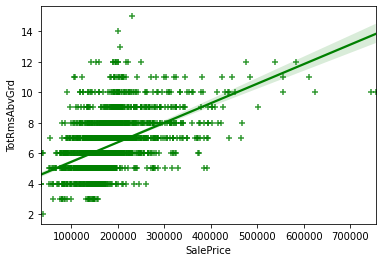

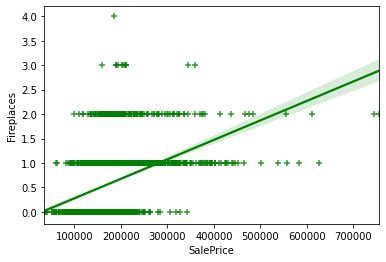

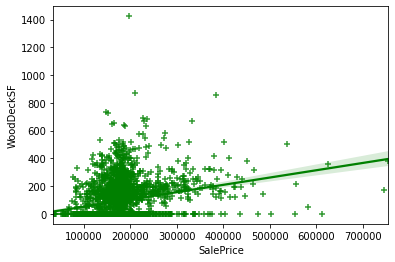

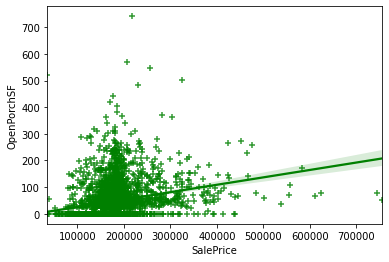

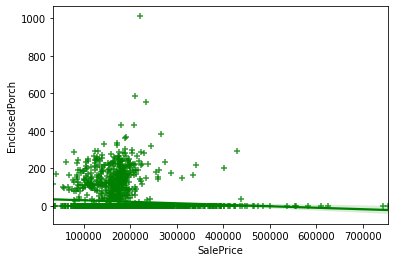

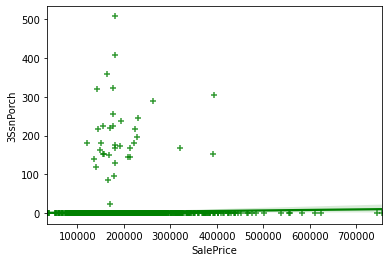

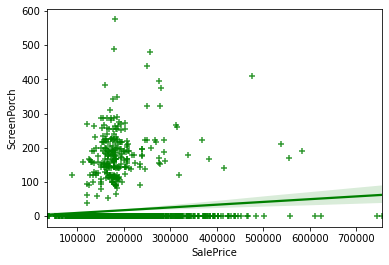

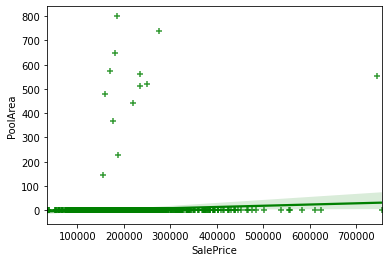

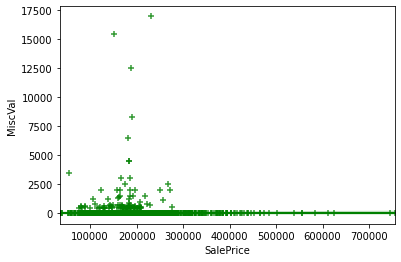

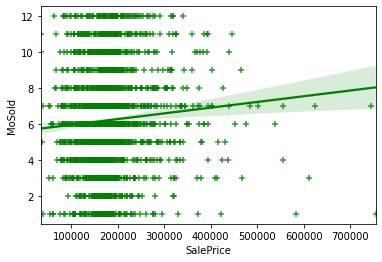

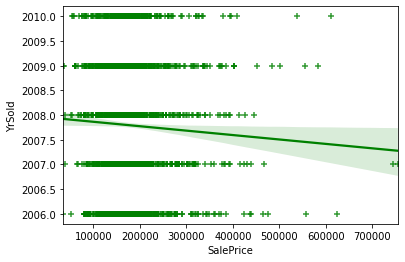

In [26]:
# Take a look on the numerical distributions : int type
for col in df.drop(['Id','SalePrice'],axis=1).select_dtypes('int'):
    plt.figure()
    ax = sns.regplot(x=df['SalePrice'], y=df[col], marker="+", color='green')

2 - Categoricals Features (object)

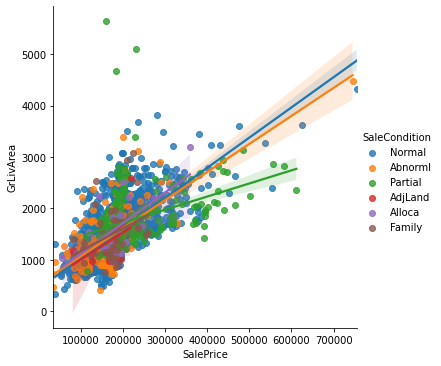

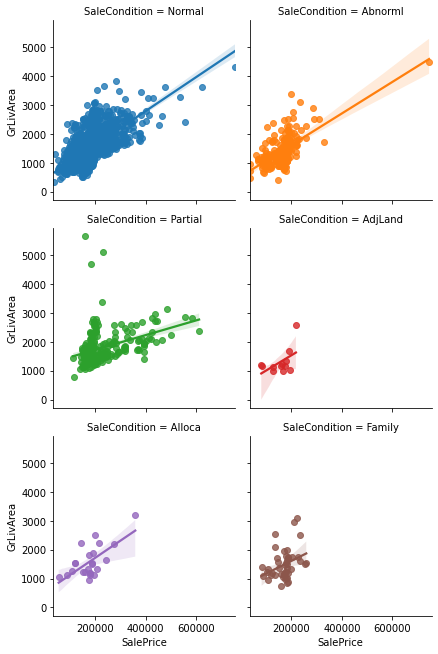

In [27]:
# Relationship beetween : SaleCondition and SalePrice with the best correalion feature : GrLivArea
g = sns.lmplot(x="SalePrice", y="GrLivArea", hue="SaleCondition", data=df)
h = sns.lmplot(x="SalePrice", y="GrLivArea", col="SaleCondition", hue="SaleCondition",
               data=df, col_wrap=2, height=3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



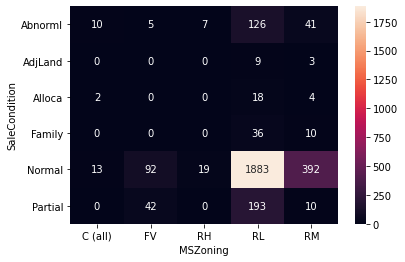

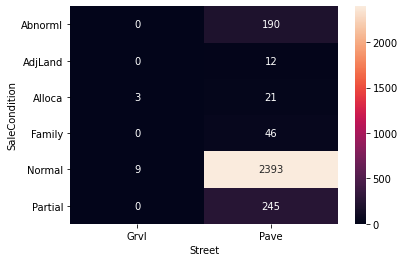

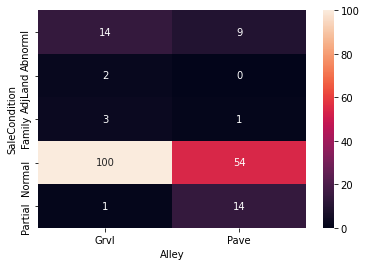

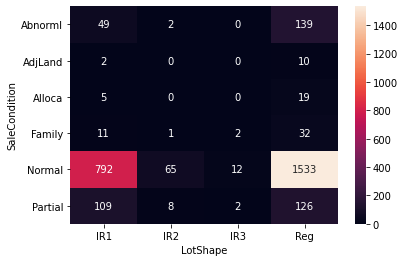

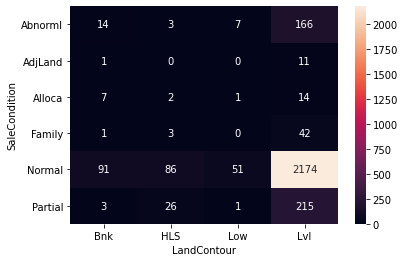

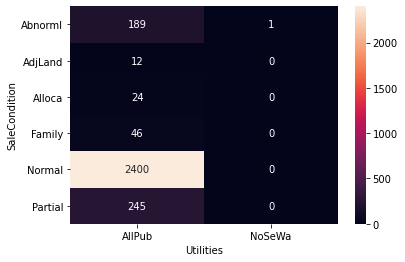

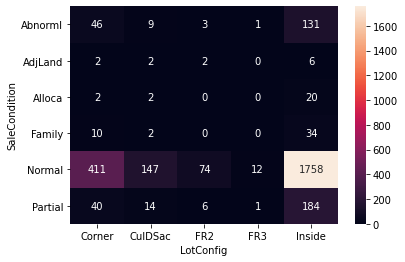

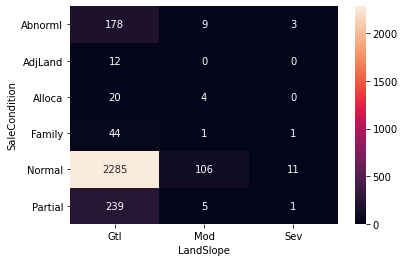

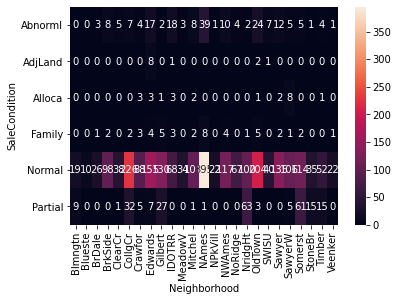

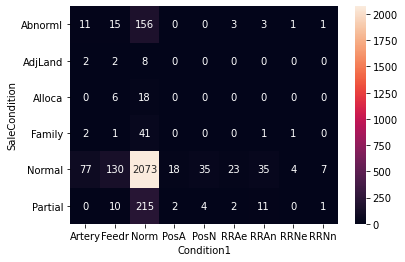

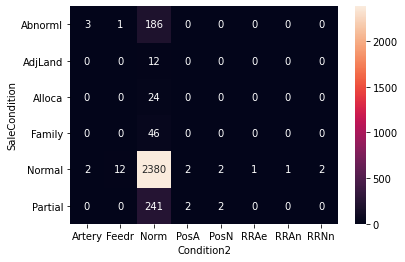

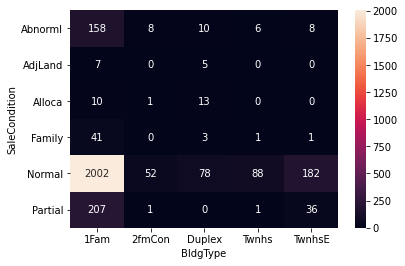

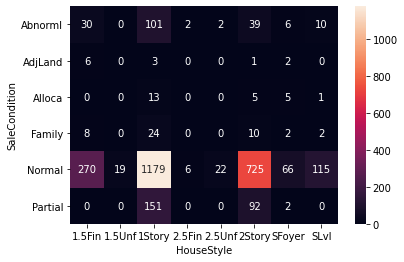

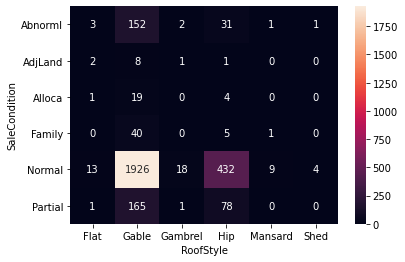

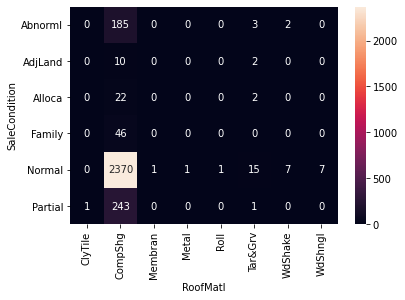

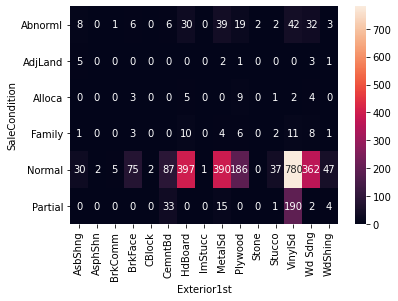

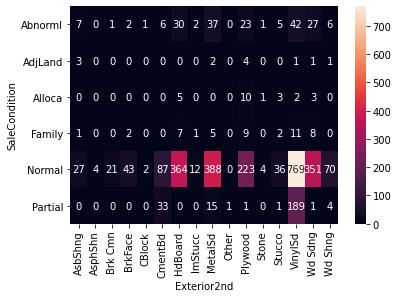

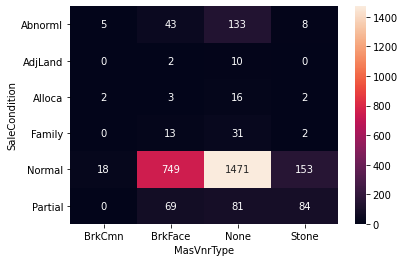

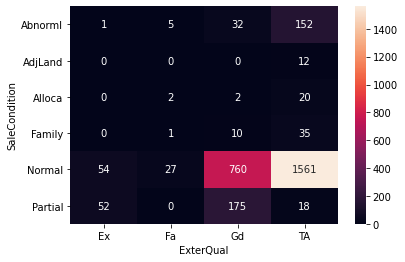

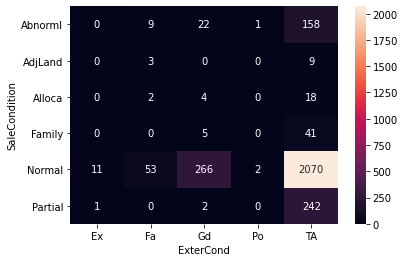

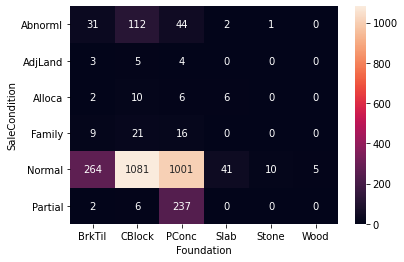

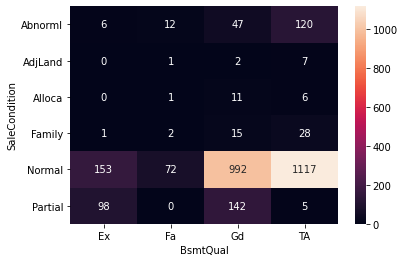

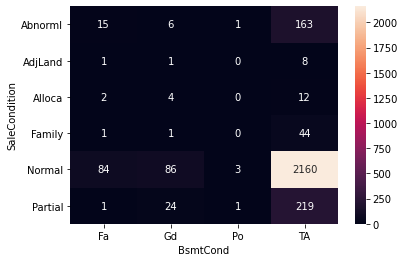

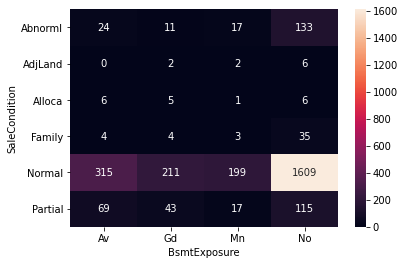

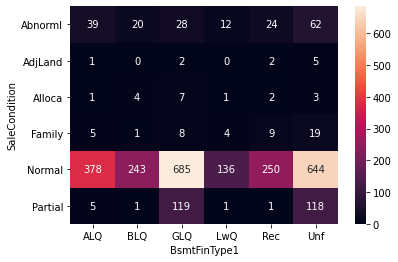

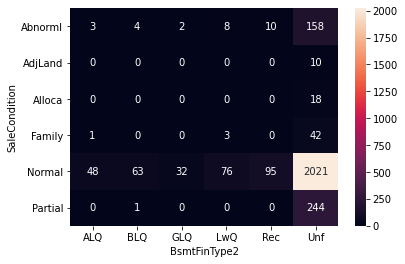

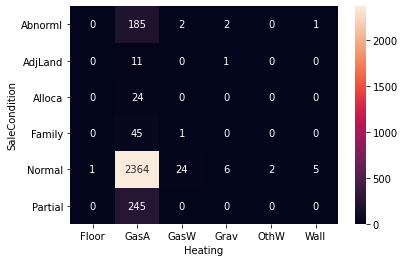

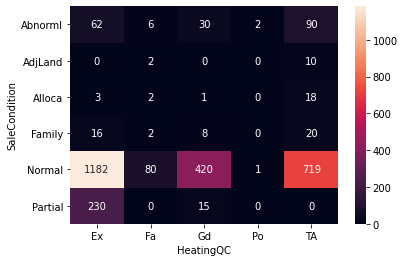

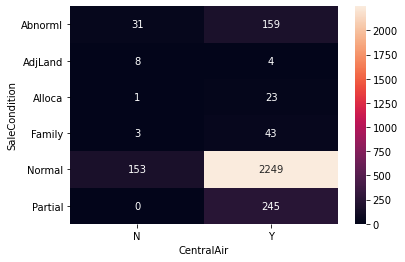

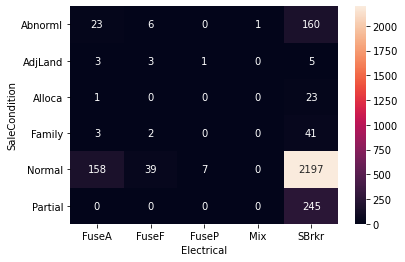

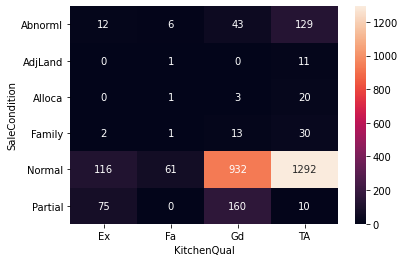

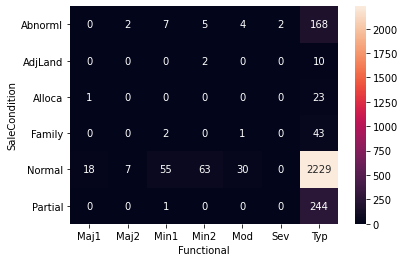

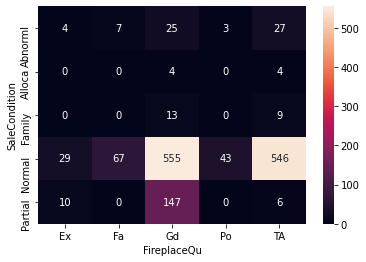

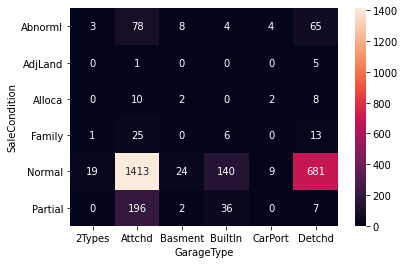

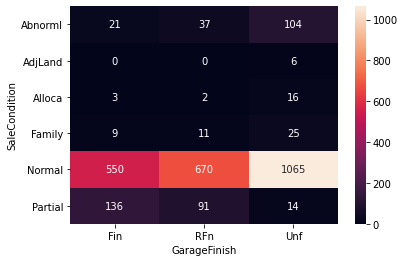

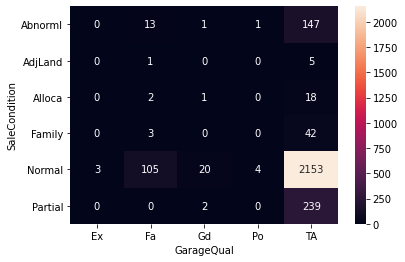

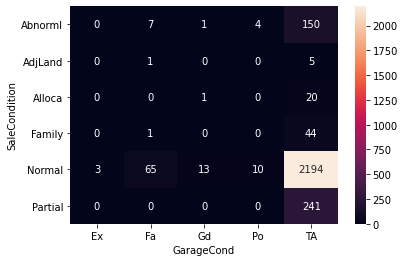

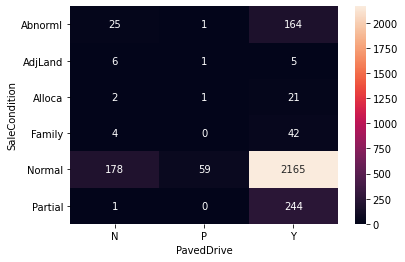

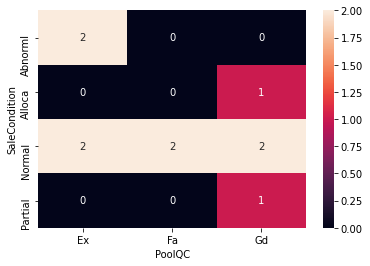

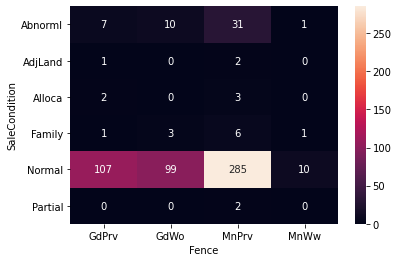

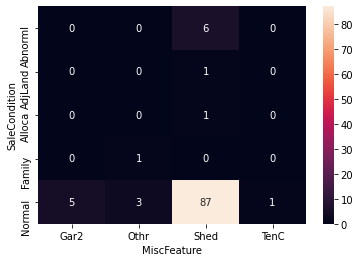

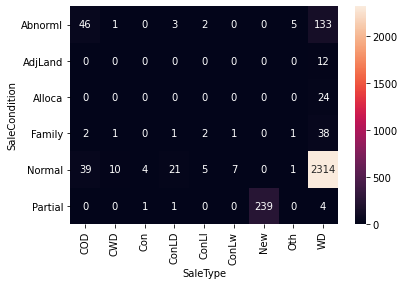

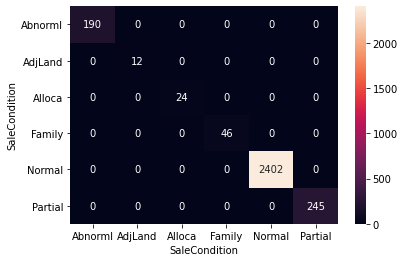

In [28]:
# Take a look on the numerical distributions : Object type
for col in df.select_dtypes(include='object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['SaleCondition'], df[col]), annot=True, fmt='d')

We will create a new variables : saleprice_bins to get a better vision

In [49]:
# new feature :
df['SalePrice_bins'] = pd.cut(df['SalePrice'],bins=6, labels=False)
df['SalePrice_bins'].value_counts()

1    2022
0     736
2     131
3      22
4       6
5       2
Name: SalePrice_bins, dtype: int64

<AxesSubplot:xlabel='SalePrice_bins', ylabel='SalePrice'>

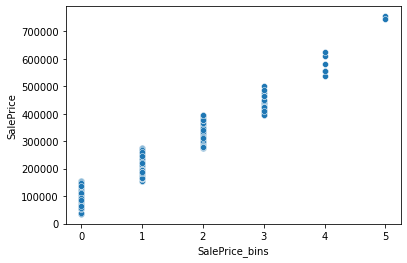

In [50]:
sns.scatterplot(x='SalePrice_bins',y='SalePrice',data=df)

In [54]:
dico_bins_sale = {
    0 : '<200k',
    1 : '<300k',
    2 : "<400k",
    3 : "<500k",
    4 : "<600k",
    5 : ">700k"
}

df['SalePrice_bins'] = df['SalePrice_bins'].map(dico_bins_sale)

### We will take a look on your group of data that we identified more early

In [142]:
def visualisation_data(dataset,xlabel):
    
    #Visualization on your Data

    #  plot Numerical Data

    a = len(dataset.select_dtypes(include='object').columns)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter


    fig = plt.figure(figsize=(14,22))

    for i in dataset.select_dtypes(include='object'):
        if i != 'SalePrice_bins':
            plt.subplot(a, b, c)
        #plt.title('{} (heatmap), subplot: {}{}{}'.format(i, a, b, c))
            plt.xlabel(xlabel)
            sns.heatmap(pd.crosstab(df['SalePrice_bins'], dataset[i]), annot=True, fmt='d')
            c = c + 1

            plt.subplot(a, b, c)
        #plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
            plt.xlabel(xlabel)
            sns.scatterplot(x=xlabel, y="SalePrice", hue=i, alpha=.5, palette="muted", data=dataset)
            c = c + 1
    
    plt.show()

In [51]:
# 1 - Group Garage Option
garage_df = df.loc[:,['GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageType','SalePrice','SalePrice_bins']]
garage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GarageFinish    2760 non-null   object 
 1   GarageQual      2760 non-null   object 
 2   GarageCond      2760 non-null   object 
 3   GarageYrBlt     2760 non-null   float64
 4   GarageType      2762 non-null   object 
 5   SalePrice       2919 non-null   float64
 6   SalePrice_bins  2919 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 182.4+ KB


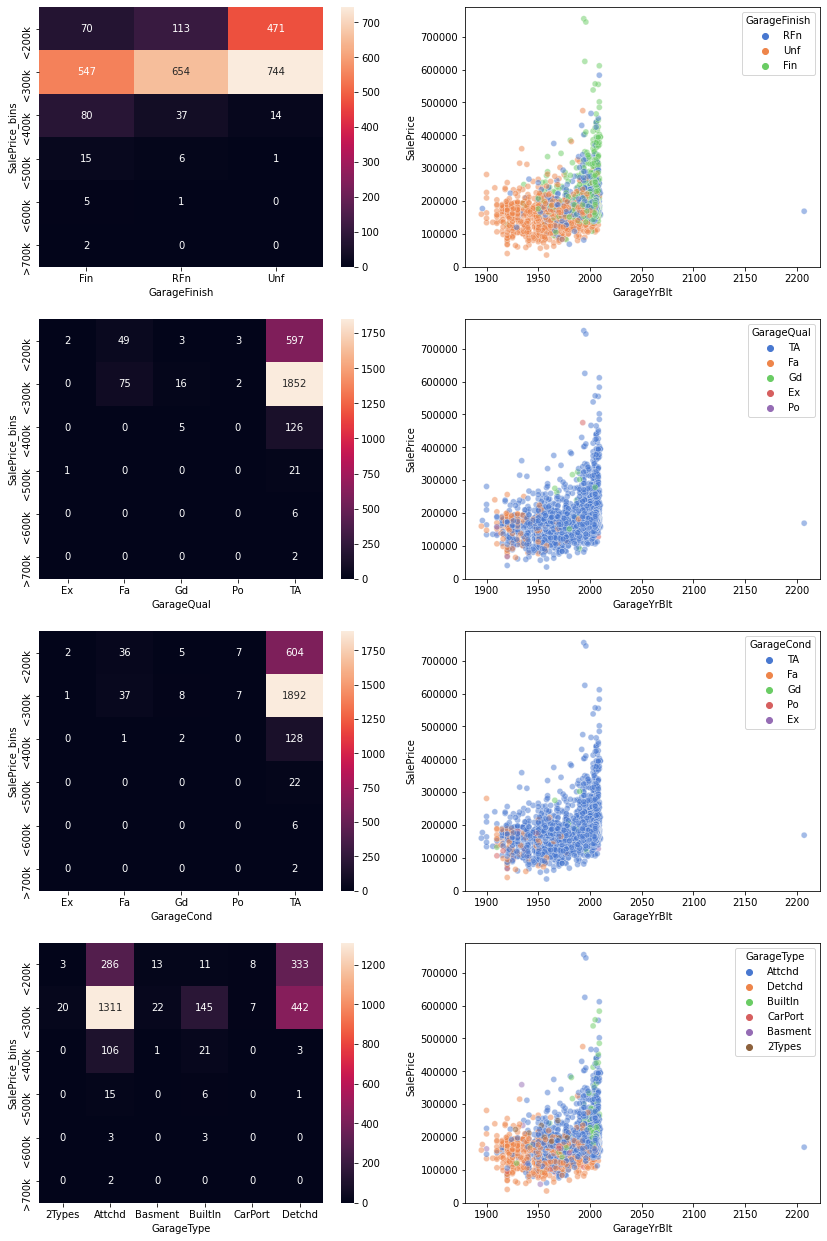

In [143]:
visualisation_data(garage_df,'GarageYrBlt')

## Conclusion : 
Garage type could be a argument for the sale price

In [136]:
# Group 2 : BSM features
bsmt_df = df.loc[:,['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','SalePrice','SalePrice_bins','YearBuilt']]
bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BsmtExposure    2837 non-null   object 
 1   BsmtCond        2837 non-null   object 
 2   BsmtQual        2838 non-null   object 
 3   BsmtFinType2    2839 non-null   object 
 4   BsmtFinType1    2840 non-null   object 
 5   SalePrice       2919 non-null   float64
 6   SalePrice_bins  2919 non-null   object 
 7   YearBuilt       2919 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 205.2+ KB


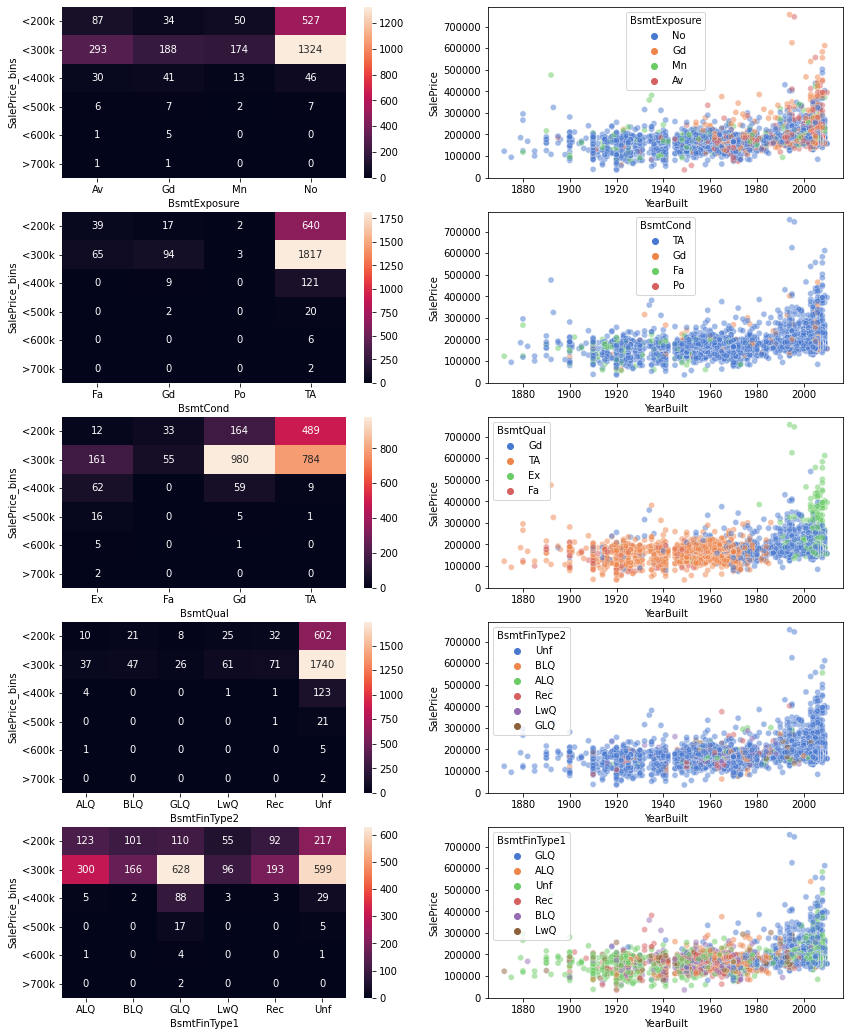

In [144]:
visualisation_data(bsmt_df, 'YearBuilt')

## Conclusion : 
BsmtQual --> we can see a linearity with year of build and salePrice!

In [146]:
# Group 3 : other features
oth_df = df.loc[:,['MasVnrType','MasVnrArea','MSZoning','SalePrice','SalePrice_bins','YearBuilt']]
oth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MasVnrType      2895 non-null   object 
 1   MasVnrArea      2896 non-null   float64
 2   MSZoning        2915 non-null   object 
 3   SalePrice       2919 non-null   float64
 4   SalePrice_bins  2919 non-null   object 
 5   YearBuilt       2919 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 159.6+ KB


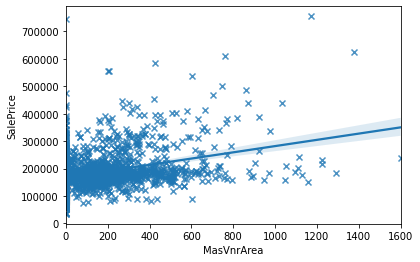

In [157]:
#MasVnrAre vs Target
g = sns.regplot(data=oth_df, x="MasVnrArea", y="SalePrice",marker='x')

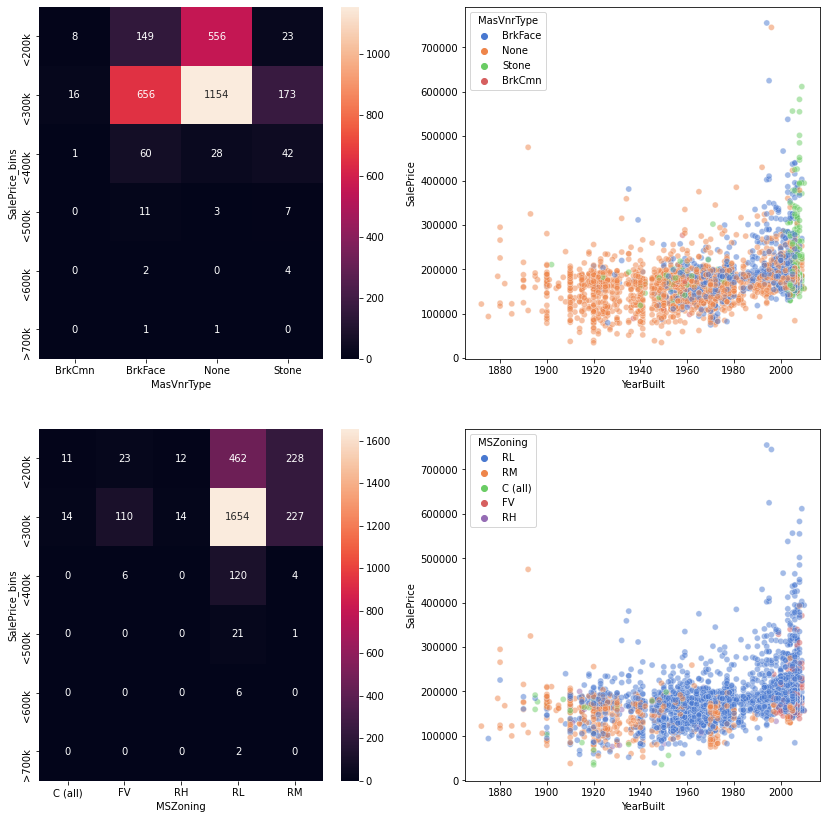

In [147]:
visualisation_data(oth_df,'YearBuilt')

## Conclusion :

MsZoning and MasVnrAre look good too

In [158]:
# Group 4 : Condtion Optional
optional_df = df.loc[:,['Functional','Utilities','BsmtHalfBath','BsmtFullBath','SalePrice','SalePrice_bins','YearBuilt']]
optional_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Functional      2917 non-null   object 
 1   Utilities       2917 non-null   object 
 2   BsmtHalfBath    2917 non-null   float64
 3   BsmtFullBath    2917 non-null   float64
 4   SalePrice       2919 non-null   float64
 5   SalePrice_bins  2919 non-null   object 
 6   YearBuilt       2919 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 182.4+ KB


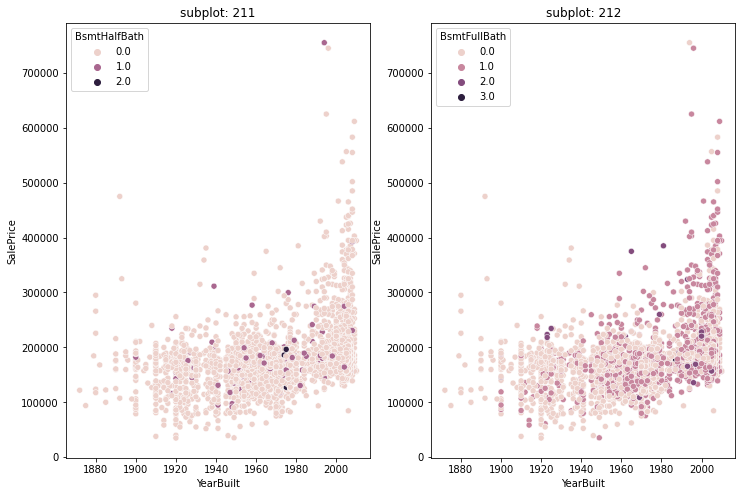

In [189]:
fig = plt.figure(figsize=(12,8))

#  subplot #1
plt.subplot(121)
plt.title('subplot: 211')
sns.scatterplot(data=optional_df, x="YearBuilt", y="SalePrice",hue="BsmtHalfBath")

#  subplot #2
plt.subplot(122)
plt.title('subplot: 212')
sns.scatterplot(data=optional_df, x="YearBuilt", y="SalePrice",hue="BsmtFullBath")

plt.show()



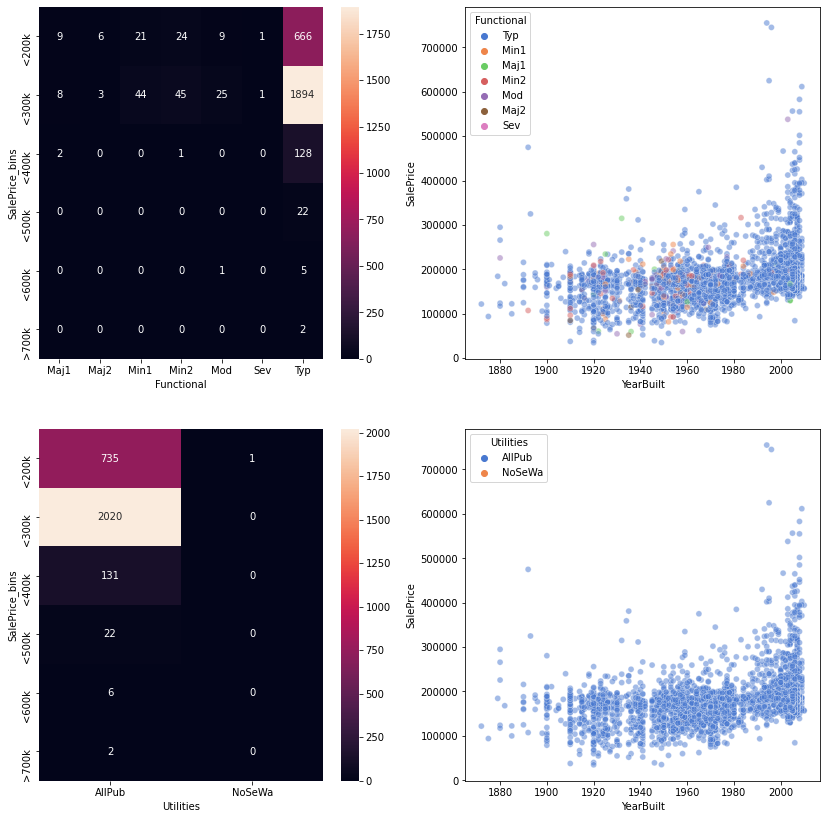

In [159]:
visualisation_data(optional_df,'YearBuilt')

In [196]:
# Group 5 : Condition Optimal
optimal_df = df.loc[:,['GarageArea','BsmtFinSF1','SaleType','GarageCars','BsmtUnfSF',
                       'Electrical','Exterior2nd',
                       'Exterior1st','KitchenQual','TotalBsmtSF','BsmtFinSF2',
                       'SalePrice','SalePrice_bins','YearBuilt']]
optimal_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GarageArea      2918 non-null   float64
 1   BsmtFinSF1      2918 non-null   float64
 2   SaleType        2918 non-null   object 
 3   GarageCars      2918 non-null   float64
 4   BsmtUnfSF       2918 non-null   float64
 5   Electrical      2918 non-null   object 
 6   Exterior2nd     2918 non-null   object 
 7   Exterior1st     2918 non-null   object 
 8   KitchenQual     2918 non-null   object 
 9   TotalBsmtSF     2918 non-null   float64
 10  BsmtFinSF2      2918 non-null   float64
 11  SalePrice       2919 non-null   float64
 12  SalePrice_bins  2919 non-null   object 
 13  YearBuilt       2919 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 342.1+ KB


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

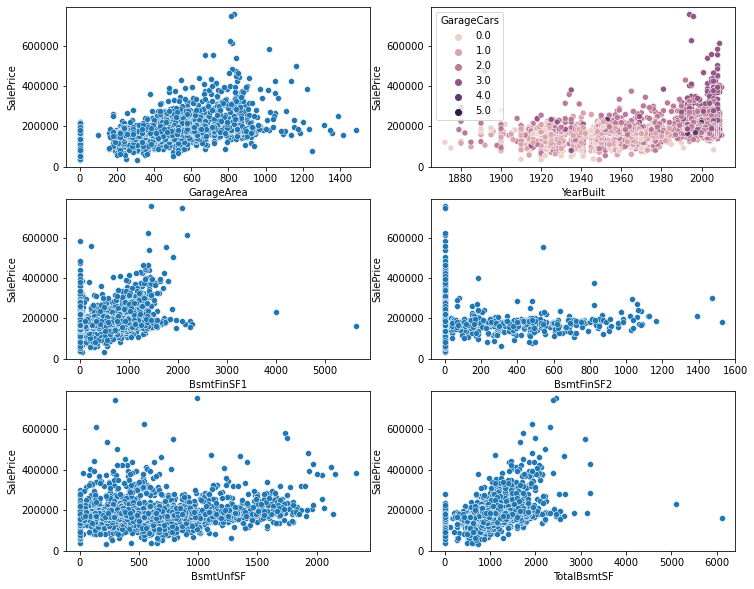

In [208]:
fig = plt.figure(figsize=(12,10))

# GarageArea
plt.subplot(321)
sns.scatterplot(data=optimal_df, x='GarageArea', y="SalePrice")

# GarageCars
plt.subplot(322)
sns.scatterplot(data=optimal_df, x='YearBuilt', y="SalePrice", hue='GarageCars')

# BsmtFinSF1
plt.subplot(323)
sns.scatterplot(data=optimal_df, x='BsmtFinSF1', y="SalePrice")

# BsmtFinSF2
plt.subplot(324)
sns.scatterplot(data=optimal_df, x='BsmtFinSF2', y="SalePrice")

# BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=optimal_df, x='BsmtUnfSF', y="SalePrice")

# TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=optimal_df, x='TotalBsmtSF', y="SalePrice")


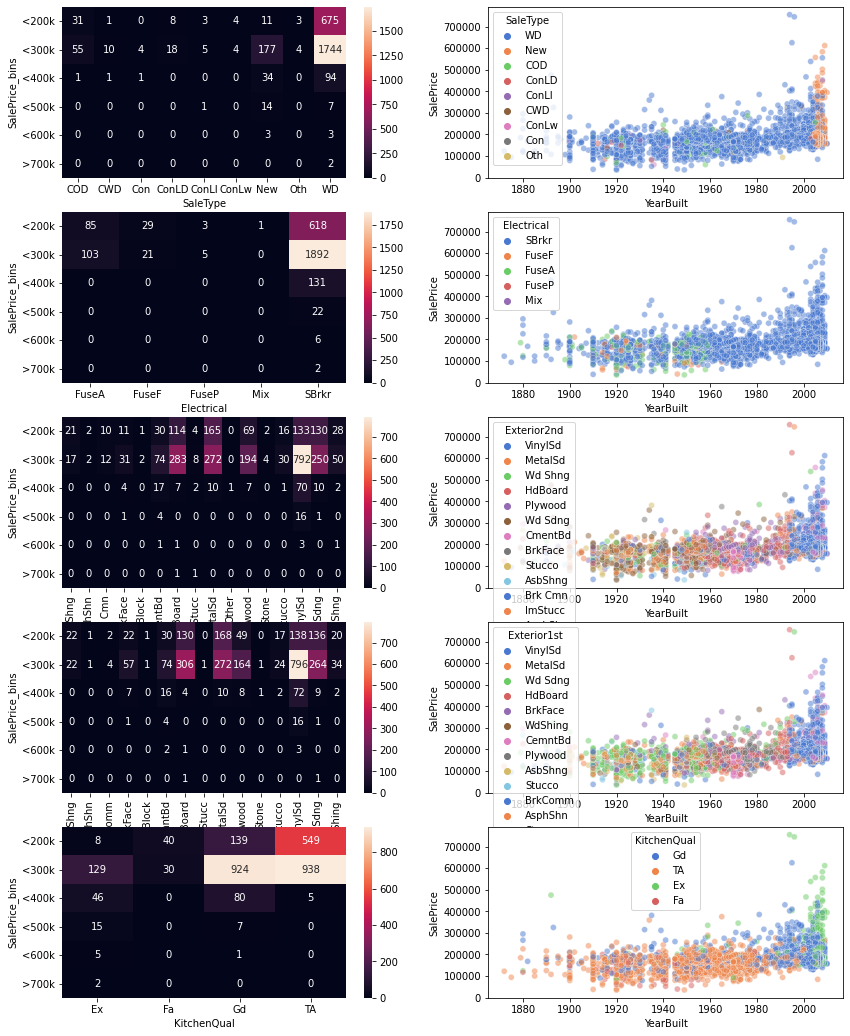

In [192]:
visualisation_data(optimal_df,'YearBuilt')

## Conclusion :

- GarageArea / GarageCars / BsmtFinSF1 / TotalBsmtSF get nice correlation too like we saw early

## Multivariate Visualisation

### Scatter Matrix

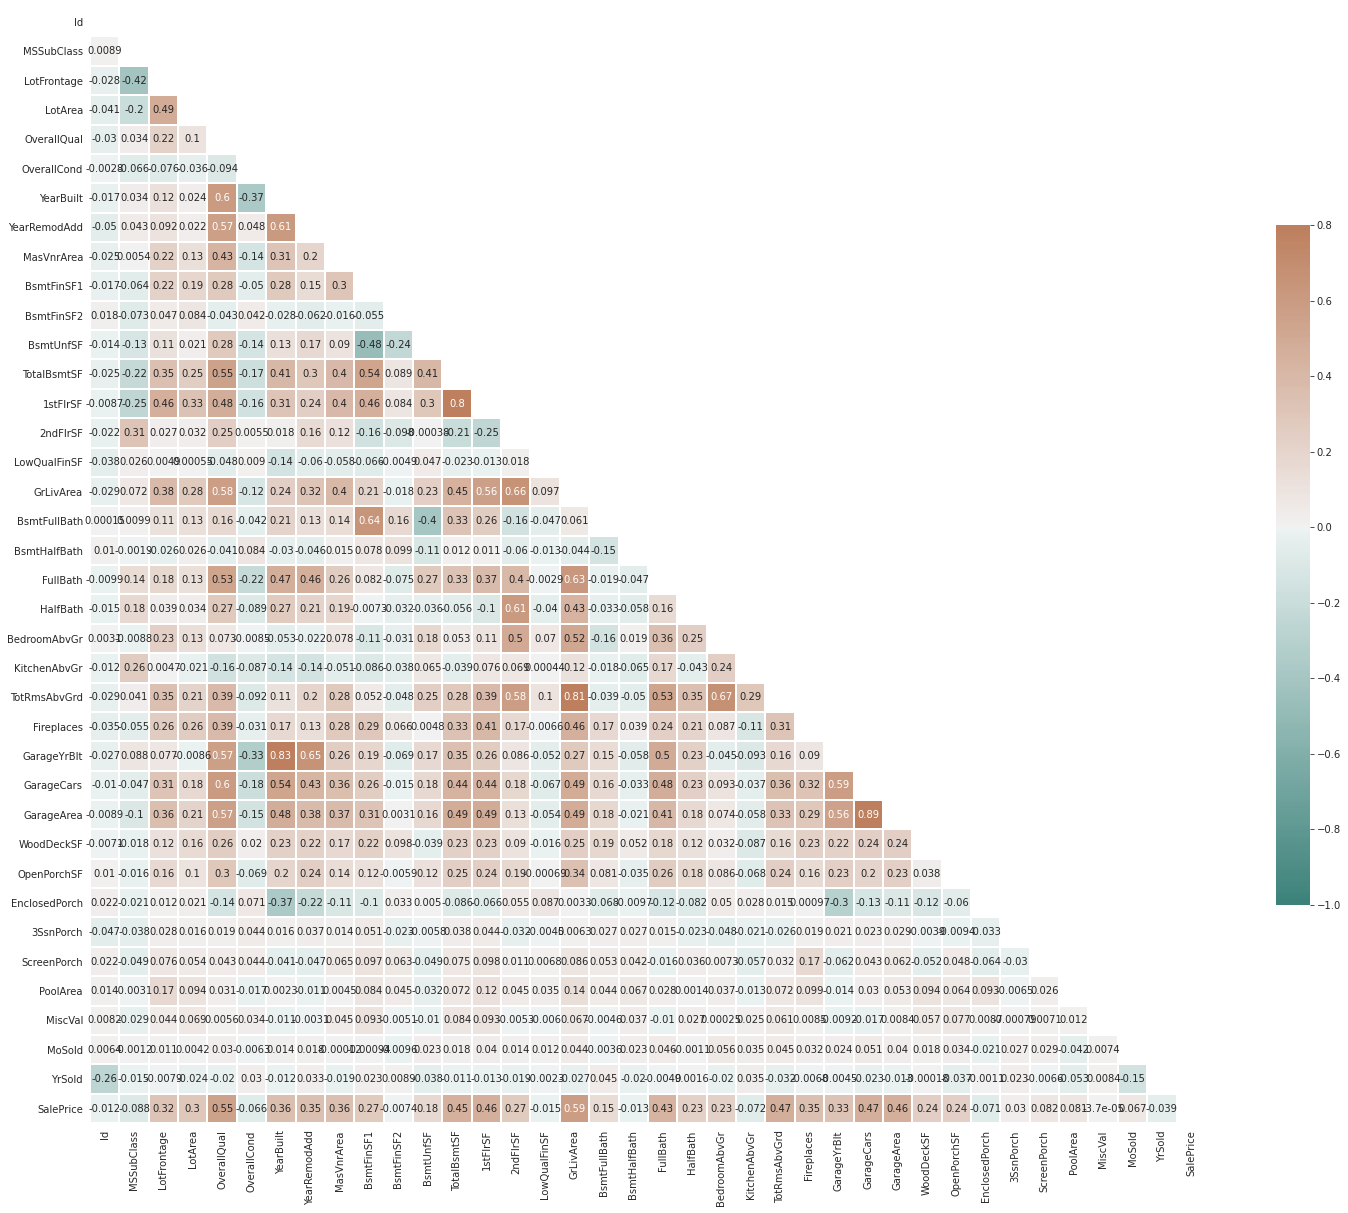

In [32]:
#correlation heatmap
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(180, 30, as_cmap=True)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 25))
    sns.heatmap(corr,  mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02);

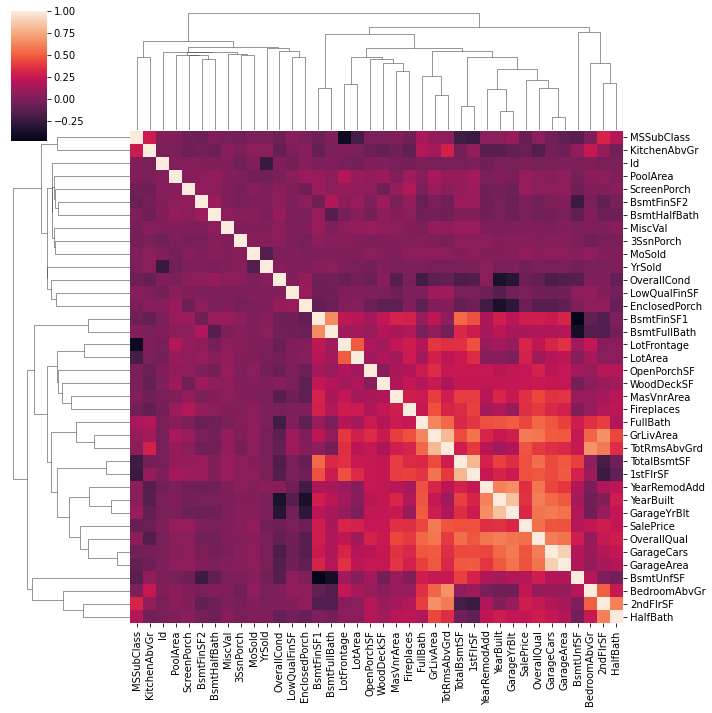

In [33]:
#Correlation Map
ax = sns.clustermap(df.select_dtypes(exclude='object').corr())       

# PHASE II : PREPROCESSING

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

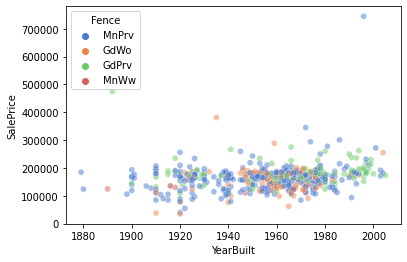

In [213]:
sns.scatterplot(x='YearBuilt', y="SalePrice", hue='Fence', alpha=.5, palette="muted", data=df)

## Procedure : 

1 - We will drop our columns with 90% + of missing values
    -> Fence don't look like a good feature to your model, so we will drop it too
    
2 - Split the dataset into a numerical and a categorical set 
 
     Look for Outliers

3 - Encodage 

4 - feature_engineering

5 - Imputation

6 - First look with a basic model

#### 1 - Drop the missing value

In [352]:
df = data.copy()

In [353]:
# Drop the columns with 80 + missing Value
df = df.loc[:,(df_pp.isnull().sum()/df.shape[0]*100) < 80]
df.shape

(2919, 77)

### 2 - Split the dataset

In [355]:
# Extract object features
num_cols = []
for col in df.select_dtypes(exclude='object'):
    num_cols.append(col)
    
# Keep object features
cat_cols = []
for col in df.select_dtypes(include='object'):
    cat_cols.append(col)

In [356]:
print(f'Numerical features : {num_cols}')
print('-'*180)
print(f'Categorical features : {cat_cols}')

Numerical features : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Categorical features : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', '

In [368]:
# Split our Dataset
df_cat = df[cat_cols]
df_num = df[num_cols]

In [358]:
print(f'Categorical shape : {df_cat.shape}')
print(f'Numerical shape : {df_num.shape}')

Categorical shape : (2919, 39)
Numerical shape : (2919, 38)


## 3 - Encodage

In [351]:
df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [248]:
for col in df_cat:
    print(f'{col :-<50} {df[col].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street-------------------------------------------- ['Pave' 'Grvl']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa' nan]
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2---------------------------

In [268]:
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0

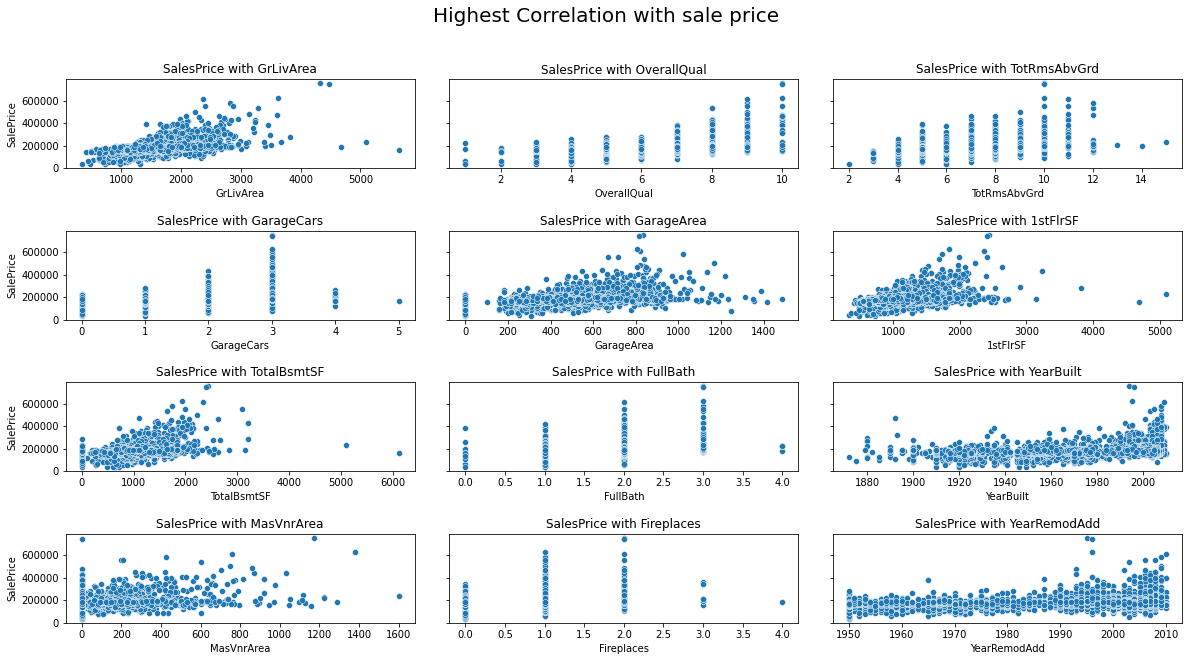

In [450]:
#Visualize columns have corr with SalePrice

high_corr = corr['SalePrice'].sort_values(ascending=False)[1:][:13].index.tolist()

fig, axes = plt.subplots(4,3, figsize=(20, 10), sharey=True);
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
fig.suptitle('Highest Correlation with sale price', fontsize=20);

for i,col in zip(range(12),high_corr):
    sns.scatterplot(y=df['SalePrice'], x=df[col], ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)